In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import numpy as np
import matplotlib.pyplot as plt

In [0]:
url='https://raw.githubusercontent.com/NastjaK666/uni/master/hate_crimes.csv'
data = pd.read_csv(url)

In [5]:
data.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [6]:
data.shape

(51, 12)

In [7]:
data.dtypes

state                                        object
median_household_income                       int64
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
dtype: object

In [8]:
data.isnull().sum()

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64

In [9]:
EmptyColumn = []
for column in data.columns:
    # Количество пустых значений 
    NullCount = data[column].isnull().sum()
    if NullCount > 0:
        EmptyColumn.append(column)
        print('Колонка {0}. Тип данных {1}. Количество пустых значений {2}.'.format(column, str(data[column].dtype), NullCount))

Колонка share_non_citizen. Тип данных float64. Количество пустых значений 3.
Колонка hate_crimes_per_100k_splc. Тип данных float64. Количество пустых значений 4.
Колонка avg_hatecrimes_per_100k_fbi. Тип данных float64. Количество пустых значений 1.


In [10]:
# Обработка методом удаления строк с пустыми значениями:
data1 = data.dropna(axis=0, how='any')
(data.shape, data1.shape)
print('Число записей до удаления:', data.shape[0])
print('Число записей после удаления:', data1.shape[0])
print("Процент потерь данных: {0} %".format(round((data.shape[0]-data1.shape[0])/data.shape[0]*100, 4)))

Число записей до удаления: 51
Число записей после удаления: 45
Процент потерь данных: 11.7647 %


In [11]:
# Обработка методом удаления столбцов с пустыми значениями:
data2 = data.dropna(axis=1, how='any')
print('Число колонок до удаления:', data.shape[1])
print('Число колонок после удаления:', data2.shape[1])
print("Процент потерь данных: {0} %".format(round((data.shape[1]-data2.shape[1])/data.shape[1]*100, 4)))

Число колонок до удаления: 12
Число колонок после удаления: 9
Процент потерь данных: 25.0 %


In [0]:
# Обработка методом заполнения строкой:
firstTemp = data[['share_non_citizen']]
secondTemp = data[['hate_crimes_per_100k_splc']]
thirdTemp = data[['avg_hatecrimes_per_100k_fbi']]

In [0]:
# Внедрение значений (нулей) - импьютация

Imputation = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0.00) 

In [14]:
sncImp = Imputation.fit_transform(firstTemp)
np.unique(sncImp)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.13])

In [15]:
hcpImp = Imputation.fit_transform(secondTemp)
np.unique(hcpImp)

array([0.        , 0.0674468 , 0.06906077, 0.07830591, 0.09540164,
       0.10515247, 0.10973335, 0.12042027, 0.12420817, 0.12583893,
       0.1336291 , 0.13654673, 0.14167316, 0.14374012, 0.1515496 ,
       0.15948963, 0.18452351, 0.18752122, 0.19071396, 0.19534455,
       0.19993848, 0.20989442, 0.21358394, 0.22531995, 0.22619711,
       0.24400659, 0.24700888, 0.25580536, 0.28510109, 0.29481132,
       0.32275417, 0.32414911, 0.32439697, 0.32867707, 0.33539227,
       0.35062045, 0.3632489 , 0.37043897, 0.3905233 , 0.40377937,
       0.45442742, 0.49549103, 0.61557402, 0.62747993, 0.63081059,
       0.67748765, 0.83284961, 1.52230172])

In [16]:
avgImp = Imputation.fit_transform(thirdTemp)
np.unique(avgImp)

array([ 0.        ,  0.26694076,  0.41201182,  0.43092759,  0.56139556,
        0.62274599,  0.69807034,  0.75276831,  0.86920887,  1.0440158 ,
        1.08167215,  1.12194465,  1.2626798 ,  1.28257183,  1.32483954,
        1.34116955,  1.46997956,  1.65670011,  1.72475458,  1.75735657,
        1.80641049,  1.88643518,  1.89133053,  1.90308139,  1.90895499,
        1.93708283,  2.03705363,  2.10598858,  2.11399015,  2.14398667,
        2.38406504,  2.3979859 ,  2.62661092,  2.68624842,  2.80468876,
        2.95495938,  3.10216428,  3.13605115,  3.20044227,  3.2404204 ,
        3.30173713,  3.39488611,  3.41392799,  3.61241182,  3.77270147,
        3.8177403 ,  4.20788962,  4.41320259,  4.74106988,  4.80189934,
       10.95347971])

In [19]:
# Преобразование категориальных данных в числовые
sncEnc = pd.DataFrame({'share_non_citizen':sncImp.T[0]})
LaEnc = LabelEncoder()
sncLaEnc = LaEnc.fit_transform(sncEnc['share_non_citizen'])
print('sncEnc unique values:\n{}\n'.format(sncEnc['share_non_citizen'].unique()))
print('sncLaEnc unique values:\n{}'.format(np.unique(sncLaEnc)))
LaEnc.inverse_transform(sncLaEnc)

sncEnc unique values:
[0.02 0.04 0.1  0.13 0.06 0.05 0.11 0.09 0.08 0.07 0.03 0.   0.01]

sncLaEnc unique values:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


array([0.02, 0.04, 0.1 , 0.04, 0.13, 0.06, 0.06, 0.05, 0.11, 0.09, 0.08,
       0.08, 0.04, 0.07, 0.03, 0.03, 0.04, 0.03, 0.02, 0.  , 0.08, 0.09,
       0.04, 0.05, 0.  , 0.02, 0.01, 0.05, 0.1 , 0.03, 0.11, 0.06, 0.1 ,
       0.05, 0.03, 0.03, 0.04, 0.07, 0.03, 0.08, 0.03, 0.  , 0.04, 0.11,
       0.04, 0.01, 0.06, 0.08, 0.01, 0.03, 0.02])

In [0]:
OHEnc = OneHotEncoder()
WorkClassOHEnc = OHEnc.fit_transform(WorkClassEnc[['workclass']])
print('Число колонок в WorkClassEnc:\n{}\n'.format(WorkClassEnc.shape[1]))
print('Число колонок в WorkClassHOEnc:\n{}\n'.format(WorkClassOHEnc.shape[1]))

In [21]:
OHEnc = OneHotEncoder()
sncOHEnc = OHEnc.fit_transform(sncEnc[['share_non_citizen']])
print('Columns in sncEnc:\n{}\n'.format(sncEnc.shape[1]))
print('Columns in sncOHEnc:\n{}\n'.format(sncOHEnc.shape[1]))

Columns in sncEnc:
1

Columns in sncOHEnc:
1



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [22]:
sncOHEnc.todense()[0:10]

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [23]:
sncEnc.head(10)

,share_non_citizen
0,0.02
1,0.04
2,0.10
3,0.04
4,0.13
5,0.06
6,0.06
7,0.05
8,0.11
9,0.09


In [0]:
#3.1. MinMax масштабирование

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['median_household_income']])

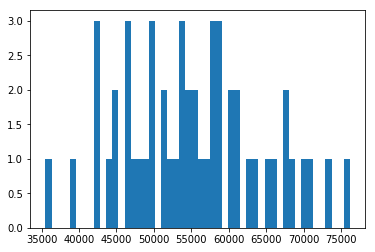

In [28]:
plt.hist(data['median_household_income'], 50)
plt.show()

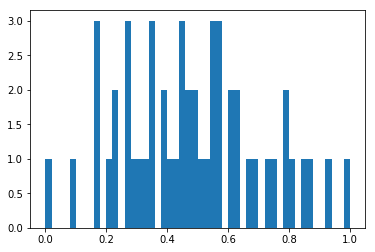

In [29]:
plt.hist(sc1_data, 50)
plt.show()

In [0]:
#Масштабирование данных на основе Z-оценки - StandardScaler

sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['median_household_income']])

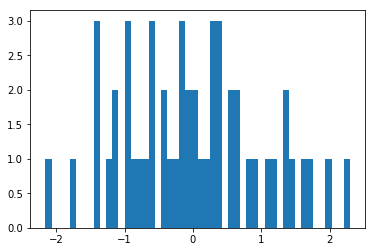

In [31]:
plt.hist(sc2_data, 50)
plt.show()

In [0]:
# Нормализация данных
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['median_household_income']])

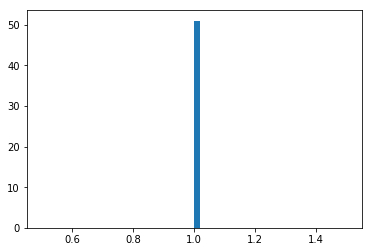

In [33]:
plt.hist(sc3_data, 50)
plt.show()